# Exploring Data with Python

Below is an example of various data exploration methods performed on the grades.csv file !ADD HYPERLINK!

In [2]:
# Import the neccessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

1. ## The data is imported from a CSV into a dataframe and can be seen below

In [3]:
df_students = pd.read_csv('data/grades.csv',delimiter=',',header='infer')
print(df_students)

         Name  StudyHours  Grade
0         Dan       10.00   50.0
1       Joann       11.50   50.0
2       Pedro        9.00   47.0
3       Rosie       16.00   97.0
4       Ethan        9.25   49.0
5       Vicky        1.00    3.0
6    Frederic       11.50   53.0
7      Jimmie        9.00   42.0
8      Rhonda        8.50   26.0
9    Giovanni       14.50   74.0
10  Francesca       15.50   82.0
11      Rajab       13.75   62.0
12    Naiyana        9.00   37.0
13       Kian        8.00   15.0
14      Jenny       15.50   70.0
15     Jakeem        8.00   27.0
16     Helena        9.00   36.0
17      Ismat        6.00   35.0
18      Anila       10.00   48.0
19       Skye       12.00   52.0
20     Daniel       12.50   63.0
21      Aisha       12.00   64.0
22       Bill        8.00    NaN
23        Ted         NaN    NaN


## 2. The dataframe has the following shape

In [4]:
rows = df_students.shape[0]
columns = df_students.shape[1]

print(f'The dataframe has {rows} number of rows')
print(f'The dataframe has {columns} number of columns')

The dataframe has 24 number of rows
The dataframe has 3 number of columns


## 3. The average values of the students grades and study hours

In [5]:
avg_study_hours = df_students.StudyHours.mean()
avg_grade = df_students.Grade.mean()

print(f"The average student's grades are {round(avg_study_hours,2)}")
print(f"The average student's study hours are {round(avg_grade,2)}")

The average student's grades are 10.41
The average student's study hours are 49.18


## 4. The null values in the datagram can be seen below as identified by 'TRUE' values in the columns

In [6]:
print(df_students.isnull())

     Name  StudyHours  Grade
0   False       False  False
1   False       False  False
2   False       False  False
3   False       False  False
4   False       False  False
5   False       False  False
6   False       False  False
7   False       False  False
8   False       False  False
9   False       False  False
10  False       False  False
11  False       False  False
12  False       False  False
13  False       False  False
14  False       False  False
15  False       False  False
16  False       False  False
17  False       False  False
18  False       False  False
19  False       False  False
20  False       False  False
21  False       False  False
22  False       False   True
23  False        True   True


## 5. A summary of the number of null values can be found below

In [7]:
print(df_students.isnull().sum())

Name          0
StudyHours    1
Grade         2
dtype: int64


## 6. The records containing null values can be identified below

In [8]:
df_students[df_students.isnull().any(axis=1)]

,Name,StudyHours,Grade
22,Bill,8.0,NaN
23,Ted,NaN,NaN


## 7. The students with null results are dropped

In [9]:
df_students = df_students.dropna(axis=0, how='any')
print(df_students)

         Name  StudyHours  Grade
0         Dan       10.00   50.0
1       Joann       11.50   50.0
2       Pedro        9.00   47.0
3       Rosie       16.00   97.0
4       Ethan        9.25   49.0
5       Vicky        1.00    3.0
6    Frederic       11.50   53.0
7      Jimmie        9.00   42.0
8      Rhonda        8.50   26.0
9    Giovanni       14.50   74.0
10  Francesca       15.50   82.0
11      Rajab       13.75   62.0
12    Naiyana        9.00   37.0
13       Kian        8.00   15.0
14      Jenny       15.50   70.0
15     Jakeem        8.00   27.0
16     Helena        9.00   36.0
17      Ismat        6.00   35.0
18      Anila       10.00   48.0
19       Skye       12.00   52.0
20     Daniel       12.50   63.0
21      Aisha       12.00   64.0


## 8. The students who studied more than the mean can be identified below

In [10]:
df_students[df_students.StudyHours > avg_study_hours]

,Name,StudyHours,Grade
1,Joann,11.50,50.0
3,Rosie,16.00,97.0
6,Frederic,11.50,53.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0
11,Rajab,13.75,62.0
14,Jenny,15.50,70.0
19,Skye,12.00,52.0
20,Daniel,12.50,63.0
21,Aisha,12.00,64.0


## 9. The mean grade of the students who studied more that average

In [11]:
avg_grade_of_students_who_studied_more_than_average = df_students[df_students.StudyHours > avg_study_hours].Grade.mean()

print(f'The average grade of students who studied more than average is {avg_grade_of_students_who_studied_more_than_average}')

The average grade of students who studied more than average is 66.7


## 10. Assuming the pass mark is 60 we add a new column indicating if the students passed or not

In [12]:
passes  = pd.Series(df_students['Grade'] >= 60)
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)

print(df_students)

         Name  StudyHours  Grade   Pass
0         Dan       10.00   50.0  False
1       Joann       11.50   50.0  False
2       Pedro        9.00   47.0  False
3       Rosie       16.00   97.0   True
4       Ethan        9.25   49.0  False
5       Vicky        1.00    3.0  False
6    Frederic       11.50   53.0  False
7      Jimmie        9.00   42.0  False
8      Rhonda        8.50   26.0  False
9    Giovanni       14.50   74.0   True
10  Francesca       15.50   82.0   True
11      Rajab       13.75   62.0   True
12    Naiyana        9.00   37.0  False
13       Kian        8.00   15.0  False
14      Jenny       15.50   70.0   True
15     Jakeem        8.00   27.0  False
16     Helena        9.00   36.0  False
17      Ismat        6.00   35.0  False
18      Anila       10.00   48.0  False
19       Skye       12.00   52.0  False
20     Daniel       12.50   63.0   True
21      Aisha       12.00   64.0   True


## 11. Sort the Dataframe by if Students passed or failed

In [13]:
df_students = df_students.sort_values('Grade', ascending=False)
print(df_students)

         Name  StudyHours  Grade   Pass
3       Rosie       16.00   97.0   True
10  Francesca       15.50   82.0   True
9    Giovanni       14.50   74.0   True
14      Jenny       15.50   70.0   True
21      Aisha       12.00   64.0   True
20     Daniel       12.50   63.0   True
11      Rajab       13.75   62.0   True
6    Frederic       11.50   53.0  False
19       Skye       12.00   52.0  False
1       Joann       11.50   50.0  False
0         Dan       10.00   50.0  False
4       Ethan        9.25   49.0  False
18      Anila       10.00   48.0  False
2       Pedro        9.00   47.0  False
7      Jimmie        9.00   42.0  False
12    Naiyana        9.00   37.0  False
16     Helena        9.00   36.0  False
17      Ismat        6.00   35.0  False
15     Jakeem        8.00   27.0  False
8      Rhonda        8.50   26.0  False
13       Kian        8.00   15.0  False
5       Vicky        1.00    3.0  False


## 12. Create a graph of the datagram

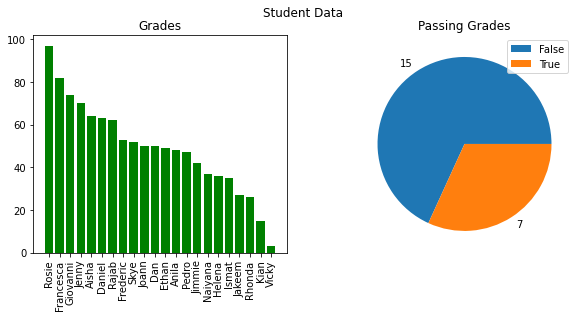

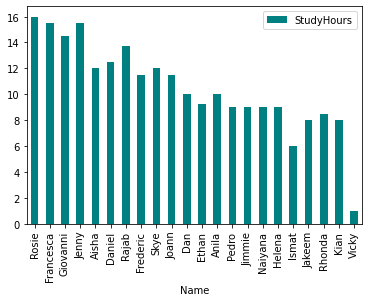

In [14]:
%matplotlib inline

# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of name vs grade on the first axis
ax[0].bar(x=df_students.Name, height=df_students.Grade, color='green')
ax[0].set_title('Grades')
ax[0].set_xticklabels(df_students.Name, rotation=90)

# Create a pie chart of pass counts on the second axis
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Student Data')

# Show the figure
fig.show()

# Create a graph of students vs studying hours
df_students.plot.bar(x='Name', y='StudyHours', color='teal', figsize=(6,4))

# Descriptive Analysis

Below a number of statistical methods will be performed on the data 

## 1. The Histogram and Box and Whiskers Plots of the Student's Grade Distributions as well as the Minimum (gray), Maximum (gray), Mean (cyan), Median (red) and Mode (yellow) values

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



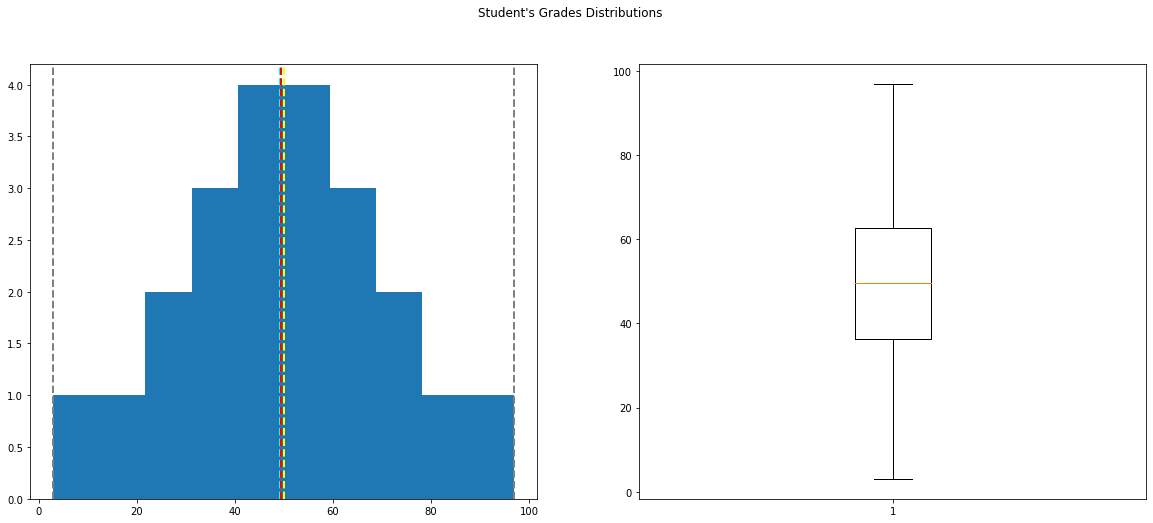

In [15]:
# Get the variable to examine
var = df_students['Grade']

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val, mean_val, med_val, mod_val, max_val))


# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (20,8))

# Create a bar plot of name vs grade on the first axis
ax[0].hist(var)
ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Create a pie chart of pass counts on the second axis
ax[1].boxplot(var)

# Add a title to the Figure
fig.suptitle("Student's Grades Distributions")

# Show the figure
fig.show()
